# Outline
1. [Frame the probelm and look at the big picture ](#1)
2. [Get the Data](#2)
3. [Explore the data to gain insights](#3)
4. [Prepare the data to better expose the underlying patterns to Machine Learning algorithms](#4)
5. [Explore many different models and short-list the best ones](#5)
6. [Fine-tune your models and combine them into a great solution](#6)
7. [Present your solution](#7)
8. [Launch, monitor, and maintain your system](#8)


<a name='1'></a>
# 1. Frame the Problem and look at the big picture
Use a Neural Network model that can identify hand written digits, using the MNIST dataset.


In [20]:
# Get the data.
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# To split the data.
from sklearn.model_selection import StratifiedShuffleSplit

# Import numpy to work with numpy arrays.
import numpy as np

# Import tensorflow & functions to create the Neural Network.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu


%matplotlib widget
import matplotlib.pyplot as plt

#
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

<a name='2'></a>
# 2. Get the Data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/home/jp/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<a name='3'></a>
# 3. Explore the data to gain insight

In [3]:
# Load the dataset
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
y = y.astype(np.uint8)

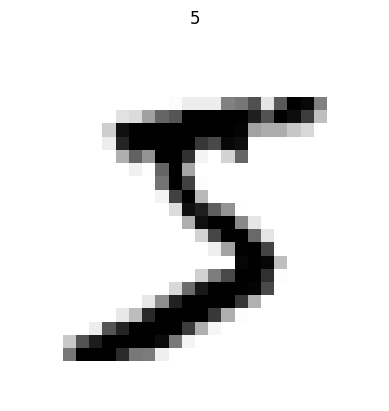

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.title(y[0])
plt.show()

In [7]:
# Chek how each class is represented in the dataset.
unique_elements, counts_elements = np.unique(y, return_counts=True)
unique_elements, counts_elements

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [8]:
# import pandas as pd
# b = pd.DataFrame(dict(
#     unique = unique_elements,
#     count = counts_elements
#     )
# )
# b['unique'] = b['unique'].astype('str')

In [9]:
# # Plot the distribution of the feature(y) classes.
# b_sorted = b.sort_values('count')
# plt.bar('unique', 'count', data=b_sorted)

# plt.show()

<a name='4'></a>
# 4. Prepare the Data

In [10]:
# Split the dataset (X, y) into two sets: A training and a temporary set (X_, y_).
split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=51)
for train_index, test_index in split.split(X, y):
    X_train, X_ = X[train_index], X[test_index]
    y_train, y_ = y[train_index], y[test_index]

In [11]:
# Split the temp set (X_, y_) into two sets: A validation and a test set.
split2 = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=51)
for train_index, test_index in split2.split(X_, y_):
    X_val, X_test = X[train_index], X[test_index]
    y_val, y_test = y[train_index], y[test_index]

In [12]:
print('Shape of the traning features (X_train): ', X_train.shape)
print('Shape of the training targets (y_train): ', y_train.shape, '\n')

print('Shape of the validation features (X_val): ', X_val.shape)
print('Shape of the validation targets (y_val): ', y_val.shape, '\n')

print('Shape of the test featrues (X_test): ', X_test.shape)
print('Shape of the target features (y_test): ', y_test.shape)

Shape of the traning features (X_train):  (50000, 784)
Shape of the training targets (y_train):  (50000,) 

Shape of the validation features (X_val):  (10000, 784)
Shape of the validation targets (y_val):  (10000,) 

Shape of the test featrues (X_test):  (10000, 784)
Shape of the target features (y_test):  (10000,)


In [13]:
# Scale down the features of each dataset.
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

<a name='5'></a>
# 5. Train a Neural Network.

In [14]:
# Build a Neural Network Model.
tf.random.set_seed(51)
model = Sequential(
    [                     
        Dense(25, activation = 'relu', name="L1"),
        Dense(15, activation = 'relu', name="L2"),
        Dense(10, name="L3")

    ], name = "model_0" 
)

2023-12-03 17:04:19.693666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:04:19.736825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:04:19.736873: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:04:19.739471: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:04:19.739521: I tensorflow/compile

In [15]:
# Compile the Model.
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [16]:
# Train the Model.
history = model.fit(
    X_train,y_train,
    epochs=40,
    validation_data=(X_val, y_val)
)

Epoch 1/40


2023-12-03 17:04:21.504801: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-03 17:04:21.656609: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4354058250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-03 17:04:21.656657: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2023-12-03 17:04:21.672238: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-03 17:04:21.712401: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-03 17:04:21.824465: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 10s 6ms/step - loss: 0.4241 - accuracy: 0.8777 - val_loss: 0.2439 - val_accuracy: 0.9283
Epoch 2/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2267 - accuracy: 0.9335 - val_loss: 0.1993 - val_accuracy: 0.9426
Epoch 3/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1872 - accuracy: 0.9453 - val_loss: 0.1658 - val_accuracy: 0.9512
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1617 - accuracy: 0.9512 - val_loss: 0.1464 - val_accuracy: 0.9576
Epoch 5/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1430 - accuracy: 0.9578 - val_loss: 0.1420 - val_accuracy: 0.9586
Epoch 6/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1302 - accuracy: 0.9614 - val_loss: 0.1468 - val_accuracy: 0.9573
Epoch 7/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1195 - accuracy: 0.9644 - val_loss: 0.1213 - val_accuracy: 0.9

In [17]:
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


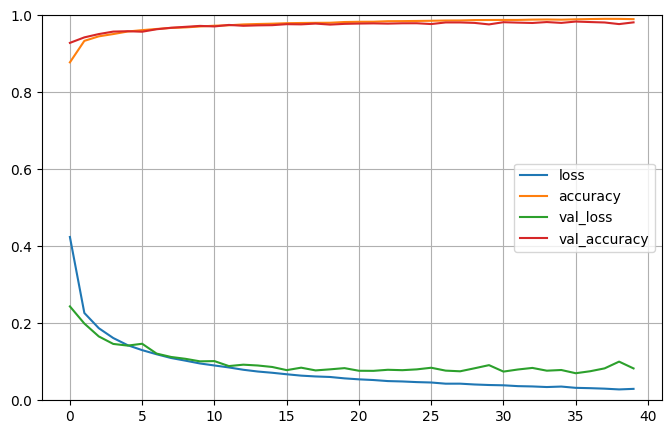

In [18]:
# Plot the metric values between the Training & Validation set.
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
# Evaluate the model on the test set.
eval = model.evaluate(X_test, y_test, batch_size=2)

5000/5000 [==============================] - 28s 6ms/step - loss: 0.0832 - accuracy: 0.9814
